# Section 1. Introduction to the problem/task and dataset

The chosen dataset for this machine project is the [FIFA Players Dataset](https://www.kaggle.com/datasets/maso0dahmed/football-players-data). The original dataset contains a total of 17954 rows and 51 features. The features contain identifying data (eg. name, birth_data), performance metrics (eg. overall_rating, freekick_accuracy) and other player-related statistics (eg. balance, agression, stamina). The dataset was created and sourced by Masood Ahmed and Talha Turab and is free to use in Kaggle. The data was scraped by the authors from [SoFIFA.com](https://sofifa.com/), a FIFA player statistic site spanning the various FIFA games.

The models aim to predict a players overall rating given relevant features. Therefore, this problem classifies as a regression task. 

# Section 2. Description of the dataset

The dataset only includes one csv file. Each of the \~18k rows in the dataset represents a FIFA Player. Their 51 columns represent the dataset features. These features include (feature descriptions sourced from the dataset authors, see [here](https://www.kaggle.com/datasets/maso0dahmed/football-players-data/data#:~:text=and%20career%20progressions.-,Features%3A,-name%3A%20Name%20of):

## Features

- **name**: Name of the player.
- **full_name**: Full name of the player.
- **birth_date**: Date of birth of the player.
- **age**: Age of the player.
- **height_cm**: Player's height in centimeters.
- **weight_kgs**: Player's weight in kilograms.
- **positions**: Positions the player can play.
- **nationality**: Player's nationality.
- **overall_rating**: Overall rating of the player in FIFA.
- **potential**: Potential rating of the player in FIFA.
- **value_euro**: Market value of the player in euros.
- **wage_euro**: Weekly wage of the player in euros.
- **preferred_foot**: Player's preferred foot.
- **international_reputation**(1-5): International reputation rating from 1 to 5.
- **weak_foot**(1-5): Rating of the player's weaker foot from 1 to 5.
- **skill_moves**(1-5): Skill moves rating from 1 to 5.
- **body_type**: Player's body type.
- **release_clause_euro**: Release clause of the player in euros.
- **national_team**: National team of the player.
- **national_rating**: Rating in the national team.
- **national_team_position**: Position in the national team.
- **national_jersey_number**: Jersey number in the national team.
- **crossing**: Rating for crossing ability.
- **finishing**: Rating for finishing ability.
- **heading_accuracy**: Rating for heading accuracy.
- **short_passing**: Rating for short passing ability.
- **volleys**: Rating for volleys.
- **dribbling**: Rating for dribbling.
- **curve**: Rating for curve shots.
- **freekick_accuracy**: Rating for free kick accuracy.
- **long_passing**: Rating for long passing.
- **ball_control**: Rating for ball control.
- **acceleration**: Rating for acceleration.
- **sprint_speed**: Rating for sprint speed.
- **agility**: Rating for agility.
- **reactions**: Rating for reactions.
- **balance**: Rating for balance.
- **shot_power**: Rating for shot power.
- **jumping**: Rating for jumping.
- **stamina**: Rating for stamina.
- **strength**: Rating for strength.
- **long_shots**: Rating for long shots.
- **aggression**: Rating for aggression.
- **interceptions**: Rating for interceptions.
- **positioning**: Rating for positioning.
- **vision**: Rating for vision.
- **penalties**: Rating for penalties.
- **composure**: Rating for composure.
- **marking**: Rating for marking.
- **standing_tackle**: Rating for standing tackle.
- **sliding_tackle**: Rating for sliding tackle.




# Section 3. List of requirements

All these libraries serve specific purposes and are commonly used when working with statistics and machine learning projects. Pandas for example allows us to transform data into Dataframe and Series data structures and lets us manipulate the data within really easily. Matplotlib and Seaborn are excellent graphing libraries while Scikit-learn lets us easily train and imrpove AI and machine learning models.

## List of external python libraries
1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Scikit-learn

# Section 4. Data preprocessing and cleaning

## 4a. Importing all relevant libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, QuantileTransformer, StandardScaler
import itertools
from collections import Counter

## 4b. Brief overview of the dataset

In [172]:
df = pd.DataFrame()
df = pd.read_csv("./fifa_players.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [173]:
df.head(3)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67


See aggregate metrics of the features. 

In [174]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


## 4c. Cleaning the dataset

First, drop the `potential` column. This is because the goal of the model is to predict a new rating and compare how accurate it is to the `overall_rating`. Since the potential rating of a player is almost 1:1 correlated with this output, the group decided not to use the feature and instead predict only based on other features like skill-related features, etc.

In [175]:
df= df.drop('potential', axis=1)

Checking for null and missing values in our dataset.

In [176]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                  

To clean the dataset, drop all duplicate values using `drop_duplicates` then columns with high null values with `drop_na`. Additionally, drop columns that act as unique identifiers for rows since they will not help the models' training. Since there are a few rows with null `value_euro` or `wage_euro`, these rows will also be dropped.

In [177]:
old_length = len(df)

# Drop duplicates
df = df.drop_duplicates(keep='first', inplace=False)

# Drop rows with null 'value_euro' or 'wage_euro'
df = df.dropna(subset=["value_euro", "wage_euro"])

# Drop columns with high null values
df = df.drop(columns=["release_clause_euro", "national_team", "national_rating", "national_team_position", "national_jersey_number"])

# Drop identifier columns
df = df.drop(columns=['name', 'full_name', 'birth_date'])

# Reset index to adjust the row indices
df = df.reset_index(drop=True)

new_length = len(df)

# Show how many rows were dropped
str(old_length - new_length) + " rows were dropped"


'255 rows were dropped'

## 4d. Invalid rows

Features that should have values in range of 0 to 100 will be checked for any invalid data. They will be stored in the `skill_100` dataframe.

In [178]:
skill_100 = df[['acceleration', 'jumping', 'aggression', 'dribbling', 'short_passing', 'positioning', 'reactions', 'overall_rating', 'long_shots', 'freekick_accuracy', 'volleys', 'vision', 'crossing', 'curve', 'agility', 'finishing', 'heading_accuracy', 'standing_tackle', 'marking', 'stamina', 'penalties', 'balance', 'strength', 'ball_control', 'interceptions', 'long_passing', 'composure', 'sliding_tackle', 'shot_power', 'sprint_speed']]
skill_100.head(3)

,acceleration,jumping,aggression,dribbling,short_passing,positioning,reactions,overall_rating,long_shots,freekick_accuracy,...,penalties,balance,strength,ball_control,interceptions,long_passing,composure,sliding_tackle,shot_power,sprint_speed
0,91,68,48,97,92,94,95,94,94,94,...,75,95,66,96,22,89,96,26,85,86
1,76,50,46,84,91,84,88,88,89,87,...,67,81,58,91,56,89,88,22,84,73
2,71,83,78,87,86,82,82,88,82,82,...,82,66,87,90,64,90,87,67,90,79


As seen, these features are all well within their 0-100 range, meaning there is no need to prune any invalid data.

In [179]:
invalid_rows = skill_100[(skill_100 < 1).any(axis=1) | (skill_100 > 100).any(axis=1)]

print("Number of invalid rows:", len(invalid_rows))

Number of invalid rows: 0


Next, all columns with values whose ranges are not limited to 0-100 will stored in `not_skill`.

In [180]:
not_skill = df.drop(columns=skill_100.columns)
not_skill.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type'],
      dtype='object')

`not_skill` will be separated into two dataframes containing continuous and categorical data.

In [181]:
not_skill_int = not_skill[['age', 'height_cm', 'weight_kgs', 'value_euro', 'wage_euro']]
not_skill_cat = not_skill.drop(columns=not_skill_int.columns)

In [182]:
# gets outliers outside the percentile range of a certain column
def get_outliers(col, percentile):
    alpha = 1 - percentile
    percentile_5 = df[col].quantile(alpha / 2)
    percentile_95 = df[col].quantile(1 - (alpha/2))
    
    in_range = df[col][(df[col] >= percentile_5) & (df[col] <= percentile_95)]
    outliers = df[col][(df[col] <= percentile_5) | (df[col] >= percentile_95)]
    print(f"Column: {col}, Outliers: {len(outliers)}, Inlier Range: {percentile_5} - {percentile_95}, Value Range: {df[col].min()} - {df[col].max()}")

See outliers and their ranges for continious columns in `not_skill_int`.

In [183]:
for col in not_skill_int.columns:
    get_outliers(col, 0.95)

Column: age, Outliers: 1388, Inlier Range: 18.0 - 35.0, Value Range: 17 - 46
Column: height_cm, Outliers: 3506, Inlier Range: 152.4 - 193.04, Value Range: 152.4 - 205.74
Column: weight_kgs, Outliers: 993, Inlier Range: 62.1 - 89.8, Value Range: 49.9 - 110.2
Column: value_euro, Outliers: 985, Inlier Range: 70000.0 - 15500000.0, Value Range: 10000.0 - 110500000.0
Column: wage_euro, Outliers: 5292, Inlier Range: 1000.0 - 58000.0, Value Range: 1000.0 - 565000.0


The maximum and minimum values for these features aren't human errors, so we will not be removing any outliers and will rely on normalization instead.

Columns in the not_skill_cat dataframe are as follows:

In [184]:
not_skill_cat.columns

Index(['positions', 'nationality', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type'],
      dtype='object')

First, for `body_type` we check to see if there are any values with too little rows in the dataset.

In [185]:
not_skill_cat.body_type.value_counts()

body_type
Normal                 10223
Lean                    6400
Stocky                  1069
Messi                      1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
C. Ronaldo                 1
Name: count, dtype: int64

Rows containing these values will be dropped.

In [186]:
df = df[df['body_type'].isin(["Normal", "Lean", "Stocky"])]

## 4e. Feature Transformation

Look through dataset for multiple representations and to understand the values better

In [187]:
import os

os.makedirs('dumps', exist_ok=True)

# Open the text file in write mode with utf-8 encoding
with open('dumps/unique_values.txt', 'w', encoding='utf-8') as file:
    for column in df.columns:
        # print(column + " column is being written")
        values = sorted(df[column].unique())
        file.write("Column: " + column + "\n")
        file.write("Unique Values = " + ", ".join(map(str, values)) + "\n")
        file.write(str(len(values)) + " unique values\n\n")
        # print(column + " has been written")
print("Data exported to 'dumps/unique_values.txt'")


Data exported to 'dumps/unique_values.txt'


### Encoding

Data will be binned using the `nationality` column and group rows by their continent. This is since some countries only have a very few amount of rows associated with them, which may introduce imbalance to the dataset.

In [188]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'Andorra': 'Europe', 
    'Angola': 'Africa', 'Antigua & Barbuda': 'North America', 'Argentina': 'South America', 
    'Armenia': 'Asia', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 
    'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe', 'Benin': 'Africa', 
    'Bermuda': 'North America', 'Bolivia': 'South America', 'Bosnia Herzegovina': 'Europe', 
    'Brazil': 'South America', 'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 
    'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa', 'Central African Rep.': 'Africa',
    'Chad': 'Africa', 'Chile': 'South America', 'China PR': 'Asia', 'Colombia': 'South America', 
    'Comoros': 'Africa', 'Congo': 'Africa', 'Costa Rica': 'North America', 'Croatia': 'Europe', 
    'Cuba': 'North America', 'Curacao': 'North America', 'Cyprus': 'Europe', 'Czech Republic': 'Europe', 
    'DR Congo': 'Africa', 'Denmark': 'Europe', 'Dominican Republic': 'North America', 'Ecuador': 'South America', 
    'Egypt': 'Africa', 'El Salvador': 'North America', 'England': 'Europe', 'Equatorial Guinea': 'Africa', 
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'FYR Macedonia': 'Europe', 'Faroe Islands': 'Europe', 
    'Fiji': 'Oceania', 'Finland': 'Europe', 'France': 'Europe', 'Gabon': 'Africa', 'Gambia': 'Africa', 
    'Georgia': 'Asia', 'Germany': 'Europe', 'Ghana': 'Africa', 'Greece': 'Europe', 'Grenada': 'North America', 
    'Guam': 'Oceania', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea Bissau': 'Africa', 
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America', 'Hong Kong': 'Asia', 
    'Hungary': 'Europe', 'Iceland': 'Europe', 'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 
    'Israel': 'Asia', 'Italy': 'Europe', 'Ivory Coast': 'Africa', 'Jamaica': 'North America', 'Japan': 'Asia', 
    'Jordan': 'Asia', 'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Korea DPR': 'Asia', 'Korea Republic': 'Asia', 
    'Kosovo': 'Europe', 'Kuwait': 'Asia', 'Latvia': 'Europe', 'Liberia': 'Africa', 'Libya': 'Africa', 
    'Liechtenstein': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Madagascar': 'Africa', 
    'Mali': 'Africa', 'Malta': 'Europe', 'Mauritania': 'Africa', 'Mexico': 'North America', 'Moldova': 'Europe', 
    'Montenegro': 'Europe', 'Montserrat': 'North America', 'Morocco': 'Africa', 'Mozambique': 'Africa', 
    'Namibia': 'Africa', 'Netherlands': 'Europe', 'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 
    'Nicaragua': 'North America', 'Nigeria': 'Africa', 'Northern Ireland': 'Europe', 'Norway': 'Europe', 
    'Oman': 'Asia', 'Palestine': 'Asia', 'Panama': 'North America', 'Papua New Guinea': 'Oceania', 
    'Paraguay': 'South America', 'Peru': 'South America', 'Philippines': 'Asia', 'Poland': 'Europe', 
    'Portugal': 'Europe', 'Republic of Ireland': 'Europe', 'Romania': 'Europe', 'Russia': 'Europe', 
    'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Scotland': 'Europe', 'Senegal': 'Africa', 
    'Serbia': 'Europe', 'Sierra Leone': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 
    'South Africa': 'Africa', 'South Sudan': 'Africa', 'Spain': 'Europe', 'St Kitts Nevis': 'North America', 
    'St Lucia': 'North America', 'Sudan': 'Africa', 'Suriname': 'South America', 'Sweden': 'Europe', 
    'Switzerland': 'Europe', 'Syria': 'Asia', 'São Tomé & Príncipe': 'Africa', 'Tanzania': 'Africa', 
    'Thailand': 'Asia', 'Togo': 'Africa', 'Trinidad & Tobago': 'North America', 'Tunisia': 'Africa', 
    'Turkey': 'Asia', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia', 
    'United States': 'North America', 'Uruguay': 'South America', 'Uzbekistan': 'Asia', 'Venezuela': 'South America', 
    'Vietnam': 'Asia', 'Wales': 'Europe', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

# Map each nationality to its continent
df['continent'] = df['nationality'].map(country_to_continent)

# Check the result
df = df.drop('nationality', axis=1)

Next, one-hot-encoding will be performed on the player positions. There are 15 total positions in the one-hot-vector.

In [189]:
positions_split = df['positions'].str.get_dummies(sep=',')
positions_split.head(3)

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


Combine these columns with the dataframe and get rid of the `positions` column.

In [190]:
df = pd.concat([df, positions_split], axis=1)
df = df.drop(columns=['positions'])

In [191]:
df.columns

Index(['age', 'height_cm', 'weight_kgs', 'overall_rating', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'continent', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW',
       'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [192]:
df['continent'].value_counts()

continent
Europe           10401
South America     3038
Asia              1916
Africa            1175
North America      892
Oceania            270
Name: count, dtype: int64

Continents will be label encoded to make them easier to work with for the models.

Continents:  
> 0 - Africa  
1 - Asia  
2 - Europe  
3 - North America  
4 - Oceania  
5 - South America

In [193]:
labels = df['continent'].unique()

In [194]:
le = LabelEncoder()
le.fit(labels)
df["continent"] = le.transform(df["continent"])

See transformed `continent` rows.

In [195]:
df['continent'].value_counts()

continent
2    10401
5     3038
1     1916
0     1175
3      892
4      270
Name: count, dtype: int64

Body types will be label encoded as well.

In [196]:
labels = df['body_type'].unique()

In [197]:
le.fit(labels)
df['body_type'] = le.transform(df["body_type"])

In [198]:
df['body_type'].value_counts()

body_type
1    10223
0     6400
2     1069
Name: count, dtype: int64

Lastly,the same will be done with preferred foot (left, right).

In [199]:
labels = df['preferred_foot'].unique()
le.fit(labels)
df['preferred_foot'] = le.transform(df["preferred_foot"])
df['preferred_foot'].value_counts()

preferred_foot
1    13576
0     4116
Name: count, dtype: int64

### Removing highly correlated features

Highly correlated features will be removed. First we will drop our y, `overall_rating`.

In [200]:
X = df
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

To remove the correlated features, we set our threshhold to be 0.7, where correlations above 0.7 will be dropped. We will first be getting the two most correlated features and comparing both features' correlations with other features in the dataset excluding themselves. The feature with the higher average correlation will be dropped. This continues until there are no more correlations between two features higher than the threshold.

In [201]:
# threshhold for correlaton
thresh = 0.7
fcorr = 1

# if highest correlation between features is less than threshold, break.
while fcorr >= thresh:
    # unstack correlation matrix
    X_corr = X.corr().abs()
    uns = X_corr.unstack().reset_index()
    
    # drop duplicates and identity rows, as well as sort by highest
    uns.drop_duplicates(inplace=True)
    uns.sort_values(0, inplace=True, ascending=False)
    # uns = uns[uns['level_0'] != uns['level_1']]
    uns = uns[uns[0] != 1.0]
    
    # unpack feature 1, feature 2 and corr
    f1, f2, fcorr = uns.iloc[0][:]

    # stop looping if fcorr is lower than threshhold
    if fcorr < thresh:
        break

    # drop f1, f2 from correlations
    f1_corr = pd.DataFrame(X_corr[f1]).drop([f1, f2])
    f2_corr = pd.DataFrame(X_corr[f2]).drop([f1, f2])

    # mean of other correlated features > threshhold
    # f1_s = f1_corr[f1_corr[f1] > thresh].mean().iloc[0]
    # f2_s = f2_corr[f2_corr[f2] > thresh].mean().iloc[0]

    # number of other correlated features > thresh
    # f1_s = len(f1_corr[f1_corr[f1] > thresh])
    # f2_s = len(f2_corr[f2_corr[f2] > thresh])

    # mean of all other correlated features
    f1_s = f1_corr.mean().iloc[0]
    f2_s = f2_corr.mean().iloc[0]

    # drop feature with highest metric
    if f1_s > f2_s:
        X.drop(columns=[f1], inplace=True)
        print(f'Dropping {f1} ({f1_s:.3f}) over {f2} ({f2_s:.3f})')
    else:
        X.drop(columns=[f2], inplace=True)
        print(f'Dropping {f2} ({f2_s:.3f}) over {f1} ({f1_s:.3f})')

Dropping standing_tackle (0.268) over sliding_tackle (0.256)
Dropping ball_control (0.444) over dribbling (0.437)
Dropping interceptions (0.258) over sliding_tackle (0.240)
Dropping acceleration (0.345) over sprint_speed (0.333)
Dropping marking (0.251) over sliding_tackle (0.227)
Dropping dribbling (0.425) over positioning (0.407)
Dropping short_passing (0.396) over long_passing (0.358)
Dropping long_shots (0.386) over shot_power (0.373)
Dropping positioning (0.379) over finishing (0.354)
Dropping volleys (0.347) over finishing (0.342)
Dropping curve (0.356) over freekick_accuracy (0.330)
Dropping value_euro (0.153) over wage_euro (0.141)
Dropping finishing (0.321) over penalties (0.310)
Dropping shot_power (0.320) over penalties (0.298)
Dropping GK (0.284) over heading_accuracy (0.239)
Dropping agility (0.290) over balance (0.262)
Dropping crossing (0.316) over freekick_accuracy (0.284)
Dropping freekick_accuracy (0.272) over penalties (0.258)
Dropping aggression (0.232) over sliding

All correations are below 0.7.

In [202]:
new_X = X.corr().abs().unstack().reset_index().sort_values(0, ascending=False)
new_X = new_X[new_X[0] != 1.0]
new_X

,level_0,level_1,0
602,penalties,skill_moves(1-5),0.695308
262,skill_moves(1-5),penalties,0.695308
641,composure,reactions,0.692606
403,reactions,composure,0.692606
567,vision,skill_moves(1-5),0.674937
...,...,...,...
240,weak_foot(1-5),RB,0.000476
734,continent,ST,0.000402
1210,ST,continent,0.000402
1088,RM,wage_euro,0.000385


In [203]:
print(f'TOTAL COLUMNS LEFT: {len(X.columns)}, COLUMNS DROPPED: {len(df.columns) - len(X.columns)}')

TOTAL COLUMNS LEFT: 35, COLUMNS DROPPED: 21


In [204]:
df = pd.concat([X, y], axis =1 )

In [205]:
print(df.columns)

Index(['age', 'height_cm', 'weight_kgs', 'wage_euro', 'preferred_foot',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'heading_accuracy', 'sprint_speed', 'reactions', 'balance',
       'jumping', 'stamina', 'strength', 'vision', 'penalties', 'composure',
       'sliding_tackle', 'continent', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LB',
       'LM', 'LW', 'LWB', 'RB', 'RM', 'RW', 'RWB', 'ST', 'overall_rating'],
      dtype='object')


### Distribution

The distribution of `age`, `height_cm`, `weight_kgs`, `heading_accuracy`, `sprint_speed`, `balance`, `jumping`, `stamina`, `strength`, `vision`, `composure`, `sliding_tackle`, and `wage_euro` will be examined.

In [206]:
name = "age height_cm weight_kgs heading_accuracy sprint_speed balance jumping stamina strength vision composure sliding_tackle".split(" ")

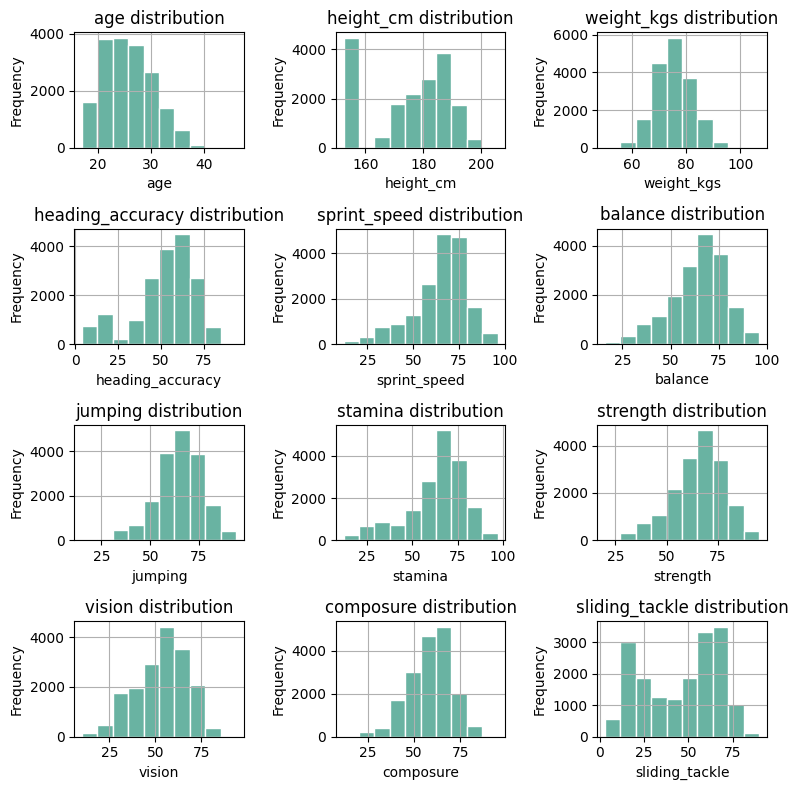

In [207]:
# Initialize a 4x3 charts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(name):
    
    # Add the histogram
    df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column} distribution') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

As seen, the distributions of these features are skewed, some peing positively skewed, some negatively. A quantile transformation will be performed to see if the feature can be transformed to a normal distribution. This is mainly because quantile transformation works for both positively and negatively skewed data.

In [208]:
def quantileTranform(df, col):
    col_df = df[[col]]
    qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal', random_state=0)
    strg = f"trans {col}"
    trans = pd.DataFrame(data=qt.fit_transform(col_df), columns=[strg])
    return trans

In [209]:
for i in range (len(name)):
    strg = f"quan_tran_{name[i]}"
    df[strg] = quantileTranform(df, name[i])

In [210]:
quan_name = "quan_tran_age quan_tran_height_cm quan_tran_weight_kgs quan_tran_heading_accuracy quan_tran_sprint_speed quan_tran_balance quan_tran_jumping quan_tran_stamina quan_tran_strength quan_tran_vision quan_tran_composure quan_tran_sliding_tackle".split(" ")

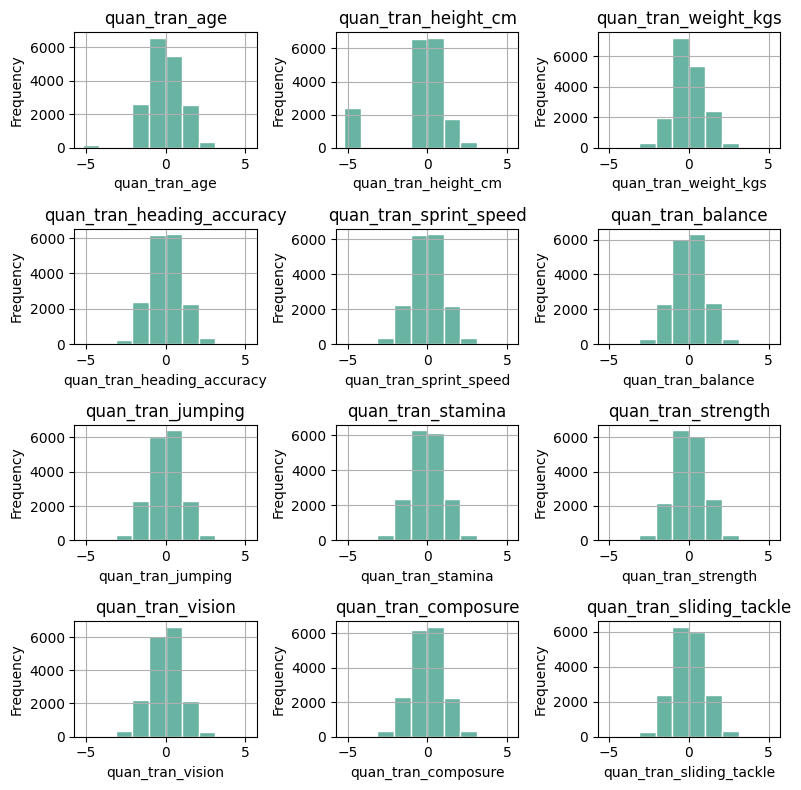

In [211]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(8, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(quan_name):
    
    # Add the histogram
    df[column].hist(ax=axes[i], # Define on which ax we're working on
                    edgecolor='white', # Color of the border
                    color='#69b3a2' # Color of the bins
                   )
    
    # Add title and axis label
    axes[i].set_title(f'{column}') 
    axes[i].set_xlabel(column) 
    axes[i].set_ylabel('Frequency') 

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

As shown from the distributions above, after performing a quantile transformation for the features in `name`, most features have now become normally distributed. However, for features such as `height_cm`, the distribution after transforming isn't a perfect normal distribution mainly due to the fact that a majority of the data is in the left side of the distribution. 

A recirpocal transformation will be done to `wage_euro`. This is mainly because a quantile transformation isn't effective due to the nature of the feature which is extremely positively skewed.

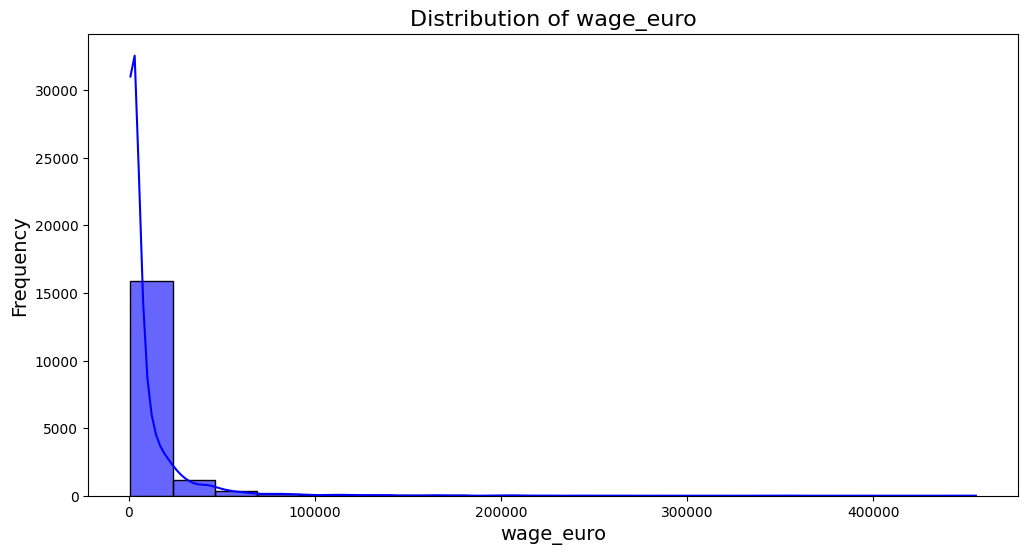

In [212]:
# Create a figure for the distribution plots
plt.figure(figsize=(12, 6))

# Plot the histogram and KDE for log_wage_euro
sns.histplot(df['wage_euro'], kde=True, bins=20, color="blue", alpha=0.6)
plt.title("Distribution of wage_euro", fontsize=16)
plt.xlabel("wage_euro", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [213]:
df['recip_wage'] = np.reciprocal(df['wage_euro'])

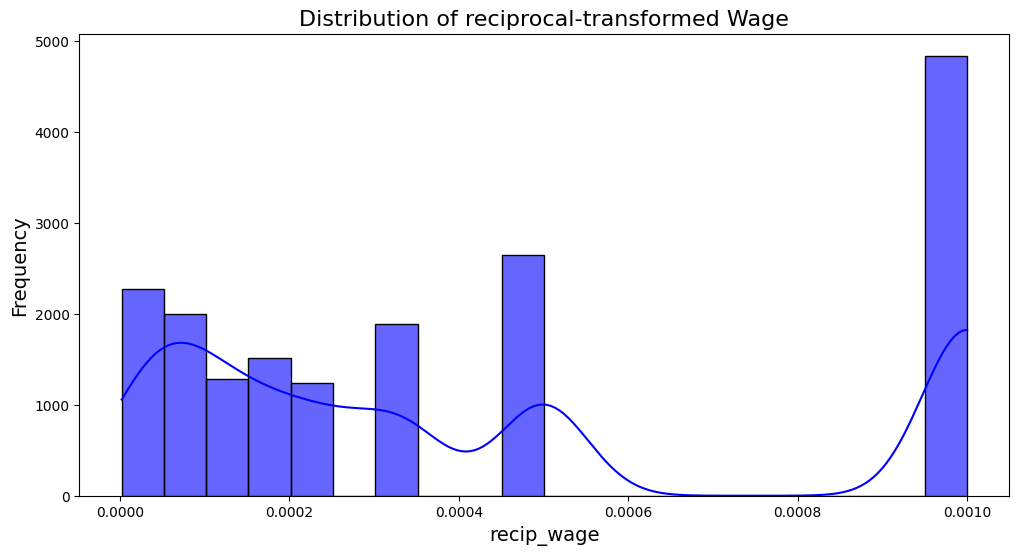

In [214]:
# Create a figure for the distribution plots
plt.figure(figsize=(12, 6))

# Plot the histogram and KDE for log_wage_euro
sns.histplot(df['recip_wage'], kde=True, bins=20, color="blue", alpha=0.6)
plt.title("Distribution of reciprocal-transformed Wage", fontsize=16)
plt.xlabel("recip_wage", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

After doing a reciprocal distribution, `recip_wage` is now negatively skewed, which is expected, however the data looks more distributed compared to other transformation. `wage_euro` won't be able to be distributed normally due to the nature of the data being extremely positively skewed

The untransformed features will now be dropped from the dataframe.

In [215]:
df = df.drop(columns=name)
df = df.drop(columns='wage_euro')
df.columns

Index(['preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'reactions', 'penalties', 'continent',
       'CAM', 'CB', 'CDM', 'CF', 'CM', 'LB', 'LM', 'LW', 'LWB', 'RB', 'RM',
       'RW', 'RWB', 'ST', 'overall_rating', 'quan_tran_age',
       'quan_tran_height_cm', 'quan_tran_weight_kgs',
       'quan_tran_heading_accuracy', 'quan_tran_sprint_speed',
       'quan_tran_balance', 'quan_tran_jumping', 'quan_tran_stamina',
       'quan_tran_strength', 'quan_tran_vision', 'quan_tran_composure',
       'quan_tran_sliding_tackle', 'recip_wage'],
      dtype='object')

As Quantile Transformation distributing the data into uniform sets, if there is any data that is outside the range, these will be turned into null. So null values will be checked again.

In [216]:
df.isnull().sum()

preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
body_type                        0
reactions                        0
penalties                        0
continent                        0
CAM                              0
CB                               0
CDM                              0
CF                               0
CM                               0
LB                               0
LM                               0
LW                               0
LWB                              0
RB                               0
RM                               0
RW                               0
RWB                              0
ST                               0
overall_rating                   0
quan_tran_age                    7
quan_tran_height_cm              7
quan_tran_weight_kgs             7
quan_tran_heading_accuracy       7
quan_tran_sprint_speed           7
quan_tran_balance   

These rows will null values will then be dropped as there are only seven instances of nulls.

In [217]:
df = df.dropna(subset=quan_name)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17685 entries, 1 to 17691
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   preferred_foot                 17685 non-null  int32  
 1   international_reputation(1-5)  17685 non-null  int64  
 2   weak_foot(1-5)                 17685 non-null  int64  
 3   skill_moves(1-5)               17685 non-null  int64  
 4   body_type                      17685 non-null  int32  
 5   reactions                      17685 non-null  int64  
 6   penalties                      17685 non-null  int64  
 7   continent                      17685 non-null  int32  
 8   CAM                            17685 non-null  int64  
 9   CB                             17685 non-null  int64  
 10  CDM                            17685 non-null  int64  
 11  CF                             17685 non-null  int64  
 12  CM                             17685 non-null  int6

## 4g. Normalization and Standardization

### Standard Scaling

Standard Scaler will be used to standardize the data.

In [219]:
y = df['overall_rating']

In [220]:
X = df.drop('overall_rating', axis=1)

In [221]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [222]:
X = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)
X

,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,reactions,penalties,continent,CAM,CB,...,quan_tran_sprint_speed,quan_tran_balance,quan_tran_jumping,quan_tran_stamina,quan_tran_strength,quan_tran_vision,quan_tran_composure,quan_tran_sliding_tackle,recip_wage,overall_rating
0,0.550587,4.858771,3.099179,2.149940,-1.213477,2.887772,1.182556,-0.257144,2.688044,-0.507587,...,1.118292,0.010709,1.647198,1.993478,1.943374,3.075977,2.864278,0.974736,-1.163252,88
1,0.550587,7.430908,1.590744,3.462436,0.523499,2.226587,2.133135,-0.257144,2.688044,-0.507587,...,1.777044,2.820243,-1.078564,0.788862,-1.477813,2.953935,2.373774,-0.755805,-1.165814,88
2,0.550587,4.858771,1.590744,2.149940,0.523499,2.336785,0.802324,-0.257144,-0.372018,-0.507587,...,0.679948,-1.437016,1.432233,0.788862,3.293652,-0.380793,2.031249,3.140468,-1.160084,88
3,0.550587,4.858771,0.082309,-0.475051,0.523499,2.226587,-0.972090,-1.706345,-0.372018,1.970105,...,0.900135,-1.018823,2.101556,0.788862,2.698713,0.374412,2.864278,2.717630,-1.156475,88
4,0.550587,4.858771,0.082309,-0.475051,0.523499,2.777575,0.865696,-0.257144,-0.372018,1.970105,...,5.181816,1.498687,0.900194,1.536149,0.403631,2.444799,2.734151,-0.440948,-1.163860,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,0.550587,7.430908,1.590744,2.149940,0.523499,3.108167,2.386622,-0.257144,-0.372018,-0.507587,...,-0.645670,-0.352226,1.941281,-0.113097,0.488446,-0.131042,0.400270,1.065890,-1.168441,91
17681,0.550587,7.430908,3.099179,2.149940,0.523499,3.218364,1.943019,-0.257144,2.688044,-0.507587,...,1.293274,2.061701,0.483689,-0.113097,-2.139280,1.399606,0.218326,-1.074971,-1.168774,91
17682,0.550587,7.430908,0.082309,-1.787547,-1.213477,3.108167,-0.528486,-0.257144,-0.372018,-0.507587,...,1.777044,1.415257,1.089791,0.788862,-0.200651,0.675931,-0.308941,-1.006173,-1.166016,91
17683,-1.816242,-0.285502,1.590744,-0.475051,0.523499,-0.528350,0.105233,-0.257144,-0.372018,-0.507587,...,1.777044,0.599850,-0.685229,-0.588735,-1.200325,-0.199455,-0.553288,-1.074971,-0.506537,67


In [223]:
df = X

### MinMax Scaling

Data will also be normalized from range 0-1.

In [224]:
X = df.drop('overall_rating', axis=1)

In [225]:
scaler = MinMaxScaler()

# Scale the numeric columns
X_min_max = scaler.fit_transform(X)
X_min_max = pd.DataFrame(X_min_max, columns=X.columns)

In [226]:
X = pd.concat([X_min_max, y.reset_index(drop=True)], axis=1)
X

,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),body_type,reactions,penalties,continent,CAM,CB,...,quan_tran_sprint_speed,quan_tran_balance,quan_tran_jumping,quan_tran_stamina,quan_tran_strength,quan_tran_vision,quan_tran_composure,quan_tran_sliding_tackle,recip_wage,overall_rating
0,1.0,0.50,1.00,0.75,0.0,0.927536,0.712644,0.4,1.0,0.0,...,0.608262,0.501568,0.657207,0.692739,0.686822,0.797190,0.776751,0.594979,0.002686,88
1,1.0,0.75,0.75,1.00,0.5,0.840580,0.885057,0.4,1.0,0.0,...,0.671768,0.769910,0.397244,0.576649,0.358486,0.785411,0.729485,0.426945,0.001728,88
2,1.0,0.50,0.75,0.75,0.5,0.855072,0.643678,0.4,0.0,0.0,...,0.566004,0.363294,0.636706,0.576649,0.816410,0.463555,0.696478,0.805269,0.003871,88
3,1.0,0.50,0.50,0.25,0.5,0.840580,0.321839,0.0,0.0,1.0,...,0.587230,0.403237,0.700541,0.576649,0.759313,0.536445,0.776751,0.764212,0.005221,88
4,1.0,0.50,0.50,0.25,0.5,0.913043,0.655172,0.4,0.0,1.0,...,1.000000,0.643687,0.585964,0.648666,0.539051,0.736271,0.764212,0.457517,0.002459,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17680,1.0,0.75,0.75,0.75,0.5,0.956522,0.931034,0.4,0.0,0.0,...,0.438209,0.466904,0.685255,0.489725,0.547191,0.487660,0.539313,0.603830,0.000745,91
17681,1.0,0.75,1.00,0.75,0.5,0.971014,0.850575,0.4,1.0,0.0,...,0.625130,0.697461,0.546240,0.489725,0.295005,0.635393,0.521781,0.395954,0.000620,91
17682,1.0,0.75,0.50,0.00,0.0,0.956522,0.402299,0.4,0.0,0.0,...,0.671768,0.635719,0.604046,0.576649,0.481057,0.565546,0.470972,0.402634,0.001652,91
17683,0.0,0.00,0.75,0.25,0.5,0.478261,0.517241,0.4,0.0,0.0,...,0.671768,0.557838,0.434758,0.443887,0.385117,0.481057,0.447426,0.395954,0.248348,67


In [227]:
df = X

In [228]:
print(df.duplicated().sum())

0


### Correlations within our X values in the dataset

Before creating models, overall correlation within the dataset will be checked. Correlations above the threshold will be checked.

In [235]:
correlation_matrix = df.corr()

threshold = 0.7
strong_correlations = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

strong_pairs = strong_correlations.stack().reset_index()
strong_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(strong_pairs)

             Feature 1            Feature 2  Correlation
0            reactions       overall_rating     0.856518
1  quan_tran_composure       overall_rating     0.743203
2           recip_wage       overall_rating    -0.712133
3       overall_rating            reactions     0.856518
4       overall_rating  quan_tran_composure     0.743203
5       overall_rating           recip_wage    -0.712133


As all the correlations above the threshold are correlated with the y `overall_rating`, these features will not be dropped.

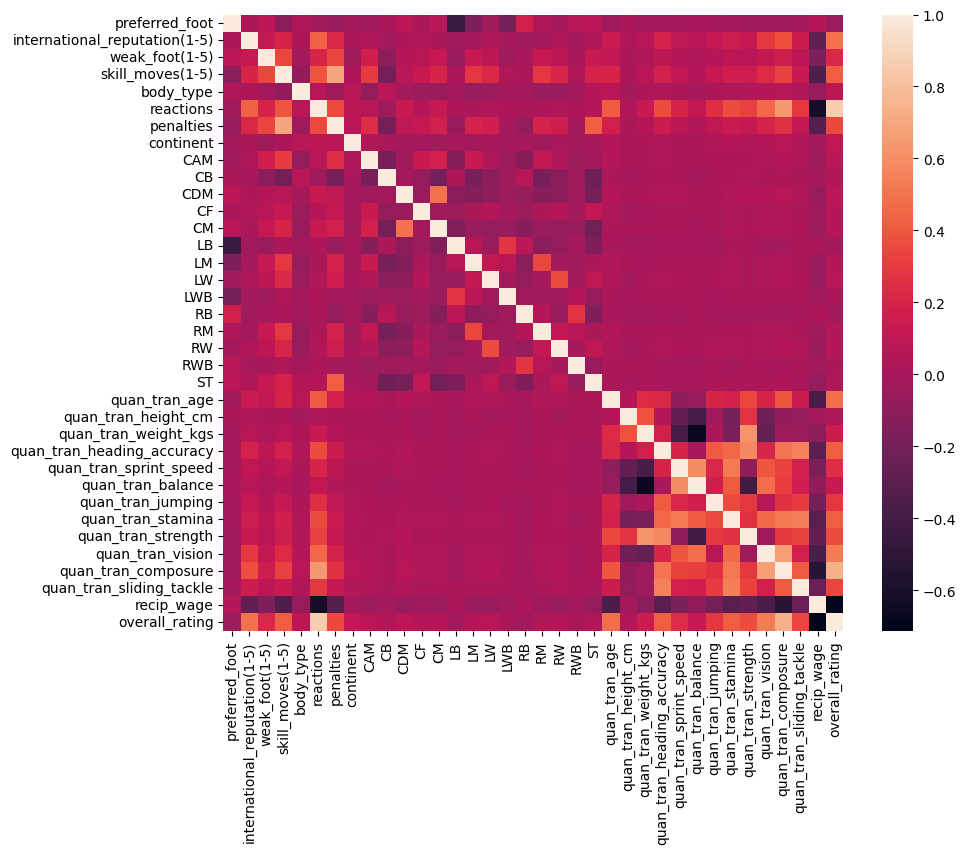

In [236]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, fmt=".3f")

As the features in the dataset have correlations with other features below the threshold, training the model will now be possible.

# Section 6. Initial model training

## K-Nearest Neighbors Model

TODO: *Insert reason why we use this model here*

Importing relevant libraries

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Creating the train and test datasets using train_test_split. We set test_size to 0.3 as it is a pretty standard test size. We stratify based on y to ensure that the data is split evently between the classes. Shuffle is to help randomize the data for possibly better fitting. Random state set for reproducability.

In [ ]:
X_knn = normalized_df
y_knn = normalized_df.values[:, -2]

Standardize features using MinMaxScaler

In [ ]:
X_knn = MinMaxScaler().fit_transform(X_knn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, stratify=y_knn, random_state=42)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTETomek
# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)

print(X_train[0])

See train and test split shape

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

Setup KNN Classifier and start fitting to the training data. For now, we will choose as arbitrary K value and distance metric that doesn't perform too badly

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, metric="euclidean", weights="uniform")
knn.fit(X_train, y_train)

Test model on training data 

In [ ]:
y_pred_train = knn.predict(X_train)
knn.score(X_train, y_train)

We got a "decent" accuracy on training data, let's check testing accuracy

Now, we test on the test data

In [ ]:
y_pred_test = knn.predict(X_test)
knn.score(X_test, y_test)

We got a similar accuracy on testing data, this means no overfitting or underfitting is occuring. Unfortunately, the accuracies aren't high in general, meaning the model isn't too useful.

Confusion matrix of results

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
cm = confusion_matrix(y_train, y_pred_train, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=knn.classes_)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
cmd.plot()

In [ ]:
print(classification_report(y_train, y_pred_train))

In [ ]:
print(classification_report(y_test, y_pred_test))

NameError: name 'classification_report' is not defined

## Testing different hyperparameters

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [ ]:
neighbor_values = [1, 5, 10, 20, 40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="distance")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="distance")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")

In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

In [ ]:
neighbor_values = [1, 5, 10, 20,40, 50, 60, 70, 80, 100, 200, 500, 1000]

best_n = None
best_cv_score = 0
best_t_score = 0
t_scores = []
cv_scores = []

print("Tuning hyperparameters with cross-validation...")
for n_neighbors in neighbor_values:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="euclidean", weights="uniform")
    
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy"))
    t_score = np.mean(cross_val_score(knn, X_test, y_test, cv=5, scoring="accuracy"))

    cv_scores.append(cv_score)
    t_scores.append(t_score)
    
    if cv_score > best_cv_score:
        best_cv_score = cv_score
        best_n = n_neighbors

    if t_score > best_t_score:
        best_t_score = t_score

    print(f"n_neighbors={n_neighbors}, CV Accuracy={cv_score:.4f}, T Accuracy = {t_score:.4f}")

print(f"\nBest number of neighbors: {best_n} with CV Accuracy: {best_cv_score:.4f}")
final_knn = KNeighborsClassifier(n_neighbors=best_n, metric="euclidean", weights="uniform")
final_knn.fit(X_train, y_train)

test_score = final_knn.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")


In [ ]:
plt.plot(neighbor_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Hyperparameter Tuning Results")
plt.xscale("log")
plt.grid(True)
plt.show()

## Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X_dt = box_df_clean.drop("Class",axis=1)
y_dt = box_df_clean["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Training data label counts:")
print(np.array([unique, counts]))

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print("Test data label counts:")
print(np.array([unique, counts]))

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
hyperparameters = [
   {
      'criterion': ['gini', 'entropy'],           
      'max_depth': [5, 10, 20, 30],               
      'min_samples_split': [2, 4, 6, 10, 15, 20, 30, 50],  
      'max_leaf_nodes': [3, 5, 10, 20, 50, 100, 200, 500]
   }
]

In [ ]:
rsc_df = RandomizedSearchCV(estimator=dtc, 
                         param_distributions=hyperparameters,
                         n_iter=50,
                         cv=5,
                         random_state=42)

In [ ]:
rsc_df.best_params_

In [ ]:
pd.set_option('display.max_colwidth', None)

rsc_results = pd.DataFrame(rsc_df.cv_results_)
rsc_results

In [ ]:
best_index = rsc_df.best_index_
best_index

In [ ]:
rsc_results.loc[best_index]

In [ ]:
best_acc = rsc_df.best_score_
best_acc

In [ ]:
predictions = dtc.predict(X_train)

In [ ]:
def compute_accuracy(predictions, actual):
   return sum(predictions == actual) / len(actual) * 100

In [ ]:
print("Training accuracy: ", compute_accuracy(predictions, y_train),"%")

In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
print("Testing accuracy: ", compute_accuracy(predictions, y_test),"%")

In [ ]:
cm = confusion_matrix(y_test, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()

In [ ]:
def describe_tree(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold
    values = clf.tree_.value

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node, values: {values}.".format(
                    space=node_depth[i] * "\t", node=i, values=values[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if X[:, {feature}] <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=feature[i],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )

In [ ]:
describe_tree(dtc)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Testing the model with respect to the `corr_df` df

In [ ]:
corr_df

In [ ]:
X = corr_df.drop(["overall_rating"],axis=1)
y = corr_df["overall_rating"]

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

In [ ]:
y_pred_train = lin_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

In [ ]:
y_pred_test = lin_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')


In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


### Testing the model with respect to the `pca_df` df

In [ ]:
pca_df

In [ ]:
X = pca_df.drop(["overall_rating"],axis=1)
y = pca_df["overall_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, y_train)

In [ ]:
y_pred_train = lin_reg.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred_train)
print(f'Mean Squared Error: {mse}')

In [ ]:
y_pred_test = lin_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error: {mse}')


In [ ]:
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


#### Improving the model

Using regularization techniques to reduce impace from correlated features

`ridge` regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming corr_df is your DataFrame
X = corr_df.drop(["overall_rating"], axis=1)
y = corr_df["overall_rating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_train = ridge_reg.predict(X_train)
y_pred = ridge_reg.predict(X_test)

# Clip the predictions to stay within the range [0, 100]
y_pred_train = np.clip(y_pred_train, 0, 100)
y_pred = np.clip(y_pred, 0, 100)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

# Print performance metrics
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse}')
print(f'R² Score (Train): {r2_train}')
print(f'R² Score (Testing): {r2}')

# Visualize Actual vs Predicted for Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TESTING)')
plt.show()

# Visualize Actual vs Predicted for Training
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_pred_train.min(), y_pred_train.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Ridge Regression TRAINING)')
plt.show()


`lasso` regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for np.clip

# Assuming corr_df is your DataFrame
X = corr_df.drop(["overall_rating"], axis=1)
y = corr_df["overall_rating"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Lasso regression model
lasso_reg = Lasso(alpha=0.001)  # Adjust alpha for regularization strength
lasso_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_train = lasso_reg.predict(X_train)
y_pred = lasso_reg.predict(X_test)

# Clip the predictions to stay within the range [0, 100]
y_pred_train = np.clip(y_pred_train, 0, 100)
y_pred = np.clip(y_pred, 0, 100)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

# Print performance metrics
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse}')
print(f'R² Score (Train): {r2_train}')
print(f'R² Score (Testing): {r2}')

# Visualize Actual vs Predicted for Testing
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TESTING)')
plt.show()

# Visualize Actual vs Predicted for Training
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_pred_train.min(), y_pred_train.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Lasso Regression TRAINING)')
plt.show()


Using hyperparameter tuning to adjust the `alpha` of the regularization

`ridge` regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the Ridge model
ridge = Ridge()

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_ridge_model = grid_search.best_estimator_

# Clip the predictions after fitting
y_pred_train = best_ridge_model.predict(X_train)
y_pred_test = best_ridge_model.predict(X_test)

# Clip the predictions to stay within the range [0, 100]
y_pred_train = np.clip(y_pred_train, 0, 100)
y_pred_test = np.clip(y_pred_test, 0, 100)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print performance metrics
print(f'Mean Squared Error (Training): {mse_train}')
print(f'Mean Squared Error (Testing): {mse_test}')
print(f'R² Score (Train): {r2_train}')
print(f'R² Score (Testing): {r2_test}')

# Extract results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Print the full grid search results
print("Grid Search Results:")
print(results[['param_alpha', 'mean_test_score', 'mean_train_score']])

# Extract values for plotting
alphas = param_grid['alpha']
mean_test_scores = results['mean_test_score']
mean_train_scores = results['mean_train_score']

# Plot alpha vs. R² score
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='--', color='b', label='Mean Test Score')
plt.plot(alphas, mean_train_scores, marker='s', linestyle='-', color='r', label='Mean Train Score')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Effect of Alpha on R² Score (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Best alpha and score
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_
print(f'\nBest alpha: {best_alpha}')
print(f'Best cross-validated R² score: {best_r2}')


`lasso` regression

In [ ]:
# Define the Lasso model
lasso = Lasso()

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5, return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract results
results = pd.DataFrame(grid_search.cv_results_)

# Print the full grid search results
print("Grid Search Results:")
print(results[['param_alpha', 'mean_test_score', 'mean_train_score', ]])

# Extract values for plotting
alphas = param_grid['alpha']
mean_test_scores = results['mean_test_score']
mean_train_scores = results['mean_train_score']

# Plot alpha vs. R² score
plt.figure(figsize=(8, 6))
plt.plot(alphas, mean_test_scores, marker='o', linestyle='--', color='b', label='Mean Test Score')
plt.plot(alphas, mean_train_scores, marker='s', linestyle='-', color='r', label='Mean Train Score')
plt.xscale('log')  # Use log scale for alpha
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R² Score')
plt.title('Effect of Alpha on R² Score (Lasso Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Best alpha and score
best_alpha = grid_search.best_params_['alpha']
best_r2 = grid_search.best_score_
print(f'\nBest alpha: {best_alpha}')
print(f'Best cross-validated R² score: {best_r2}')
